# Abdrakhmanov Renat, BDA - 1903
# Analysis of English Premier League 2018-2019 season
<h4>Content</h4>

+ Introduction
+ Data description
+ Formulation of research question
+ Data preparation
+ Data Visualization
+ Conclusion

# 1.Introduction
The English Premier League is a professional football competition held in the United Kingdom. It is attended by 20 English clubs. There are about 580 players participated in EPL from 2018-2019 season.
Let's move on to the process of running League games. A table of 20 teams is created in which each of them plays with all the others twice: at their own stadiums(at home) and others'(away).If a team wins a match, it is awarded 3 points, a draw is 1 point, and a loss is 0 points. There are n*(n-1)/2 games in total, which in our case is 190 games. Which team will score the most points in 38 rounds then it will become the winner of the tournament. Also, along with points,other statistics are counted, such as the number of wins, draws, losses, goals scored and conceded, as well as the difference between goals scored and goals conceded. For example, in the 2019-2020 season, Liverpool became the champion with the following statistics: 32 wins, 3 draws, 3 losses, 85 goals and 33 conceded, the difference is 52.

Full description of the League you can read on https://en.wikipedia.org/wiki/Premier_League

<img src="https://cdn-blog.scorum.com/production/mortilla007/7da1f4df8e27dd77_800" >

# 2.Data description

My analysis will cover 4 datasets. One the main set includes data about players, the size of which is 572 rows. Three additional ones are data about teams that are 20 rows in size, data about league itself - 1 row and all team matches are 380 rows in size. All three form is an overall information about the Premier League.<br>
<mark>players</mark> dataset is based on such indicators as:<br>

+ position - characterizes the location of the player in the match(such as striker, midfielder, defender, goalkeeper)
+ minutes played - how much time the player spent on the field for the entire season 
+ nationality
+ number of goals
+ number of assists(pass that led to a goal)
+ number of yellow cards - cards awarded for agressive play
+ number of red cards - such cards remove the player from the game for unsportsmanlike behavior
+ rank in the top Strikers 
+ rank in the top Midfielders 
+ rank in the top Defenders
+ rank in the top Goalkeepers 
+ etc.


<mark>games</mark> dataset consists of:
+ home team name
+ away team name
+ referee - the name of a referee in a match
+ home team goal count - goals scored by home team in a game
+ away team goal count - goals scored by away team in a game
+ home team goal timing - minutes in which goals are scored by home team
+ away team goal timing - minutes in which goals are scored by away team
+ total corners count - number of corner kicks during a game
+ total yellow card count
+ total red card count
+ home team shots on target - number of shots directed to a goal's target by home team
+ away team shots on target - number of shots directed to a goal's target by away team
+ etc.


<mark>teams</mark> dataset consists of:
+ matches played
+ wins
+ wins home 
+ wins away 
+ draws home
+ draws away
+ losses home
+ losses away
+ average points per game
+ goals scored
+ goals conceded
+ goals difference
+ etc.

<mark>league</mark> dataset consists of:
+ total matches
+ goals scored
+ goals conceded
+ clean sheets - games where team does not concede goals 
+ total corners
+ total red cards
+ total yellow cards
+ etc.

# 3.Formulation of research question
My project will consist of 5 parts:
1. Analysis of points scored and goals scored by teams and their distribution by these indicators.
2. Analysis of results such as the number of wins and points scored by teams throughout the season.
3. Team performance in the first half of the match and in the second half.
4. Analysis of players resultative actions.
5. Analysis of sports and physiological indicators of players and their relationship.

# 4.Data preparation

In [1]:
import pandas as pd
import numpy as np
import requests
import pandas_profiling

In [2]:
# let's open players.csv file
# the main one
csv_file = open(file = 'players.csv',
               mode = 'r',
               encoding = 'ISO-8859-1')
# three additional files
csv1_file = open(file = 'teams.csv',
               mode = 'r',
               encoding = 'ISO-8859-1')

csv2_file = open(file = 'league.csv',
               mode = 'r',
               encoding = 'ISO-8859-1')

csv3_file = open(file = 'matches.csv',
               mode = 'r',
               encoding = 'ISO-8859-1')

In [3]:
# show csv file in txt format
csv_file.read()

"full_name,age,birthday,league,season,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,goals_away,assists_overall,assists_home,assists_away,penalty_goals,penalty_misses,clean_sheets_overall,clean_sheets_home,clean_sheets_away,conceded_overall,conceded_home,conceded_away,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer\nAaron Cresswell,30,629683200,Premier League,2018/2019,Defender,West Ham United,1589,888,701,England,20,10,8,0,0,0,1,1,0,0,0,3,2,1,22,12,10,1,0,0.06,0.06,0,0,0,0,1.25,72,79,1589,1589,0.06,292

In [172]:
# use pandas in order to show file as a dataframe
players = pd.read_csv('players.csv')
teams = pd.read_csv('teams.csv')
league = pd.read_csv('league.csv')
games = pd.read_csv('matches.csv')

players

,full_name,age,birthday,league,season,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Cresswell,30,629683200,Premier League,2018/2019,Defender,West Ham United,1589,888,701,...,1.25,72,79,1589,1589,0.06,292,193,80,20
1,Aaron Lennon,33,545529600,Premier League,2018/2019,Midfielder,Burnley,1217,487,730,...,1.48,61,76,1217,1217,0.07,198,187,-1,10
2,Aaron Mooy,29,653356800,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,1137,...,1.78,51,80,582,2327,0.15,147,233,-1,3
3,Aaron Ramsey,29,662169600,Premier League,2018/2019,Midfielder,Arsenal,1327,689,638,...,0.81,111,47,0,221,0.00,69,8,-1,5
4,Aaron Rowe,19,968284800,Premier League,2018/2019,Forward,Huddersfield Town,69,14,55,...,1.30,69,35,0,0,0.00,-1,-1,-1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Youri Tielemans,23,862963200,Premier League,2018/2019,Midfielder,Leicester City,1092,575,517,...,1.07,84,84,546,273,0.16,81,13,-1,4
568,Yves Bissouma,23,841363200,Premier League,2018/2019,Midfielder,Brighton & Hove Albion,1769,747,1022,...,1.53,59,63,354,0,0.25,402,335,-1,17
569,Zechariah Medley,20,962928000,Premier League,2018/2019,Defender,Arsenal,0,0,0,...,0.00,0,0,0,0,0.00,-1,-1,-1,-1
570,Zeze Steven Sessegnon,20,958608000,Premier League,2018/2019,Defender,Fulham,0,0,0,...,0.00,0,0,0,0,0.00,-1,-1,-1,-1


In [398]:
teams

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_scored_min_81_to_90,goals_conceded_min_0_to_10,goals_conceded_min_11_to_20,goals_conceded_min_21_to_30,goals_conceded_min_31_to_40,goals_conceded_min_41_to_50,goals_conceded_min_51_to_60,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90
0,Arsenal FC,Arsenal,2018/2019,England,38,19,19,0,21,14,...,13,3,7,5,5,9,1,12,1,8
1,Tottenham Hotspur FC,Tottenham Hotspur,2018/2019,England,38,19,19,0,23,12,...,10,3,4,1,2,1,6,4,8,10
2,Manchester City FC,Manchester City,2018/2019,England,38,19,19,0,32,18,...,10,0,2,3,3,3,3,4,2,3
3,Leicester City FC,Leicester City,2018/2019,England,38,19,19,0,15,8,...,14,8,5,1,7,6,4,7,1,9
4,Crystal Palace FC,Crystal Palace,2018/2019,England,38,19,19,0,14,5,...,11,1,2,3,4,7,9,8,8,11
5,Everton FC,Everton,2018/2019,England,38,19,19,0,15,10,...,8,2,2,3,6,9,5,10,5,4
6,Burnley FC,Burnley,2018/2019,England,38,19,19,0,11,7,...,8,7,10,6,5,4,7,10,4,15
7,Southampton FC,Southampton,2018/2019,England,38,19,19,0,9,5,...,5,5,6,6,7,6,12,5,4,14
8,AFC Bournemouth,AFC Bournemouth,2018/2019,England,38,19,19,0,13,8,...,11,4,8,7,11,7,8,8,6,11
9,Manchester United FC,Manchester United,2018/2019,England,38,19,19,0,19,10,...,10,3,6,9,1,7,7,7,7,7


In [399]:
games

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,...,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name,home_result,away_result
0,1533927600,Aug 10 2018 - 7:00pm,complete,NaN,Manchester United,Leicester City,Andre Marriner,0.00,0.00,1.89,...,9.81,1.33,2.00,3.60,0.0,2.05,1.69,Old Trafford (Manchester),3,0
1,1533987000,Aug 11 2018 - 11:30am,complete,NaN,Newcastle United,Tottenham Hotspur,Martin Atkinson,0.00,0.00,1.32,...,1.84,1.31,1.95,3.50,0.0,1.83,1.87,St. James' Park (Newcastle upon Tyne),0,3
2,1533996000,Aug 11 2018 - 2:00pm,complete,NaN,AFC Bournemouth,Cardiff City,Kevin Friend,0.00,0.00,1.53,...,3.96,1.31,1.95,3.45,0.0,1.83,1.83,Vitality Stadium (Bournemouth- Dorset),3,0
3,1533996000,Aug 11 2018 - 2:00pm,complete,NaN,Fulham,Crystal Palace,Mike Dean,0.00,0.00,1.11,...,3.26,1.28,1.87,3.20,0.0,1.71,2.00,Craven Cottage (London),0,3
4,1533996000,Aug 11 2018 - 2:00pm,complete,NaN,Huddersfield Town,Chelsea,Chris Kavanagh,0.00,0.00,0.47,...,1.51,1.29,1.91,3.30,0.0,2.00,1.71,John Smith's Stadium (Huddersfield- West Yorks...,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,1557669600,May 12 2019 - 2:00pm,complete,NaN,Liverpool,Wolverhampton Wanderers,Martin Atkinson,2.78,1.28,2.79,...,9.00,1.18,1.57,2.45,0.0,1.95,1.83,Anfield (Liverpool),3,0
376,1557669600,May 12 2019 - 2:00pm,complete,NaN,Manchester United,Cardiff City,Jonathan Moss,2.00,0.61,1.89,...,10.00,1.12,1.41,2.00,0.0,1.74,2.05,Old Trafford (Manchester),0,3
377,1557669600,May 12 2019 - 2:00pm,complete,NaN,Southampton,Huddersfield Town,Lee Probert,1.22,0.33,1.21,...,7.50,1.19,1.61,2.50,0.0,1.80,2.00,St. Mary's Stadium (Southampton- Hampshire),1,1
378,1557669600,May 12 2019 - 2:00pm,complete,NaN,Tottenham Hotspur,Everton,Andre Marriner,2.06,1.06,2.00,...,3.55,1.22,1.71,2.80,0.0,1.59,2.30,Tottenham Hotspur Stadium (London),1,1


In [400]:
league

,name,season,status,format,number_of_clubs,total_matches,matches_completed,game_week,total_game_week,progress,...,goals_min_51_to_60,goals_min_61_to_70,goals_min_71_to_80,goals_min_81_to_90,goals_min_0_to_15,goals_min_16_to_30,goals_min_31_to_45,goals_min_46_to_60,goals_min_61_to_75,goals_min_76_to_90
0,Premier League,2018/2019,Completed,NaN,20,380,380,38,38,100,...,112,133,119,186,134,172,170,158,185,253


In [5]:
# dataframe size
players.shape

(572, 46)

In [6]:
# dataframe size
teams.shape

(20, 280)

In [402]:
games.shape

(380, 63)

In [403]:
league.shape

(1, 70)

In [7]:
# delete unnecessary columns
players.drop(['birthday' , 'league' , 'season', "rank_in_league_top_attackers", "rank_in_league_top_midfielders",
              "rank_in_league_top_defenders", "rank_in_club_top_scorer"], axis = 'columns', inplace = True)
players

,full_name,age,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,...,goals_per_90_overall,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall
0,Aaron Cresswell,30,Defender,West Ham United,1589,888,701,England,20,10,...,0.00,0.00,0.00,0,1.25,72,79,1589,1589,0.06
1,Aaron Lennon,33,Midfielder,Burnley,1217,487,730,England,16,5,...,0.07,0.18,0.00,1217,1.48,61,76,1217,1217,0.07
2,Aaron Mooy,29,Midfielder,Huddersfield Town,2327,1190,1137,Australia,29,13,...,0.12,0.08,0.16,776,1.78,51,80,582,2327,0.15
3,Aaron Ramsey,29,Midfielder,Arsenal,1327,689,638,Wales,28,8,...,0.27,0.26,0.28,332,0.81,111,47,0,221,0.00
4,Aaron Rowe,19,Forward,Huddersfield Town,69,14,55,England,2,0,...,0.00,0.00,0.00,0,1.30,69,35,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Youri Tielemans,23,Midfielder,Leicester City,1092,575,517,Belgium,13,7,...,0.25,0.31,0.17,364,1.07,84,84,546,273,0.16
568,Yves Bissouma,23,Midfielder,Brighton & Hove Albion,1769,747,1022,Mali,28,7,...,0.00,0.00,0.00,0,1.53,59,63,354,0,0.25
569,Zechariah Medley,20,Defender,Arsenal,0,0,0,England,0,0,...,0.00,0.00,0.00,0,0.00,0,0,0,0,0.00
570,Zeze Steven Sessegnon,20,Defender,Fulham,0,0,0,England,0,0,...,0.00,0.00,0.00,0,0.00,0,0,0,0,0.00


<h3>Not corresponding values in players dataframe</h3>
<br>
In the dataframe there are such columns as clean_sheets_overall and conceded_overall which are closely related to Goalkeepers and not related to Other positions. So we delete values of these columns where corresponding player position is not Goalkeeper and replace them by 0.

In [404]:
players
for x in players.index:
    if players.loc[x, "position"] != 'Goalkeeper':
        players.loc[x, "clean_sheets_overall"] = 0
        players.loc[x, "conceded_overall"] = 0
        players.loc[x, "clean_sheets_home"] = 0
        players.loc[x, "clean_sheets_away"] = 0
        players.loc[x, "conceded_home"] = 0
        players.loc[x, "conceded_away"] = 0
        players.loc[x, "conceded_per_90_overall"] = 0
        players.loc[x, "min_per_conceded_overall"] = 0

In [405]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   full_name                       572 non-null    object 
 1   age                             572 non-null    int64  
 2   birthday                        572 non-null    int64  
 3   league                          572 non-null    object 
 4   season                          572 non-null    object 
 5   position                        572 non-null    object 
 6   Current Club                    572 non-null    object 
 7   minutes_played_overall          572 non-null    int64  
 8   minutes_played_home             572 non-null    int64  
 9   minutes_played_away             572 non-null    int64  
 10  nationality                     572 non-null    object 
 11  appearances_overall             572 non-null    int64  
 12  appearances_home                572 

In [406]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 280 entries, team_name to goals_conceded_min_81_to_90
dtypes: float64(30), int64(246), object(4)
memory usage: 43.9+ KB


In [407]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 63 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   timestamp                            380 non-null    int64  
 1   date_GMT                             380 non-null    object 
 2   status                               380 non-null    object 
 3   attendance                           0 non-null      float64
 4   home_team_name                       380 non-null    object 
 5   away_team_name                       380 non-null    object 
 6   referee                              380 non-null    object 
 7   Pre-Match PPG (Home)                 380 non-null    float64
 8   Pre-Match PPG (Away)                 380 non-null    float64
 9   home_ppg                             380 non-null    float64
 10  away_ppg                             380 non-null    float64
 11  home_team_goal_count            

In [408]:
league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 70 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   name                                 1 non-null      object 
 1   season                               1 non-null      object 
 2   status                               1 non-null      object 
 3   format                               0 non-null      float64
 4   number_of_clubs                      1 non-null      int64  
 5   total_matches                        1 non-null      int64  
 6   matches_completed                    1 non-null      int64  
 7   game_week                            1 non-null      int64  
 8   total_game_week                      1 non-null      int64  
 9   progress                             1 non-null      int64  
 10  average_goals_per_match              1 non-null      float64
 11  average_scored_home_team            

In [12]:
# the another way to find null values 
players.isnull().sum()

full_name                        0
age                              0
position                         0
Current Club                     0
minutes_played_overall           0
minutes_played_home              0
minutes_played_away              0
nationality                      0
appearances_overall              0
appearances_home                 0
appearances_away                 0
goals_overall                    0
goals_home                       0
goals_away                       0
assists_overall                  0
assists_home                     0
assists_away                     0
penalty_goals                    0
penalty_misses                   0
clean_sheets_overall             0
clean_sheets_home                0
clean_sheets_away                0
conceded_overall                 0
conceded_home                    0
conceded_away                    0
yellow_cards_overall             0
red_cards_overall                0
goals_involved_per_90_overall    0
assists_per_90_overa

In [13]:
teams.isnull().sum()

team_name                      0
common_name                    0
season                         0
country                        0
matches_played                 0
                              ..
goals_conceded_min_41_to_50    0
goals_conceded_min_51_to_60    0
goals_conceded_min_61_to_70    0
goals_conceded_min_71_to_80    0
goals_conceded_min_81_to_90    0
Length: 280, dtype: int64

In [409]:
games.isnull().sum()

timestamp           0
date_GMT            0
status              0
attendance        380
home_team_name      0
                 ... 
odds_btts_yes       0
odds_btts_no        0
stadium_name        0
home_result         0
away_result         0
Length: 63, dtype: int64

In [410]:
league.isnull().sum()

name                  0
season                0
status                0
format                1
number_of_clubs       0
                     ..
goals_min_16_to_30    0
goals_min_31_to_45    0
goals_min_46_to_60    0
goals_min_61_to_75    0
goals_min_76_to_90    0
Length: 70, dtype: int64

In [411]:
# drop missing values
players1 = players.dropna()
teams1 = teams.dropna()
league1 = league.dropna()
games1 = games.dropna()

In [412]:
league1.describe()

,format,number_of_clubs,total_matches,matches_completed,game_week,total_game_week,progress,average_goals_per_match,average_scored_home_team,average_scored_away_team,...,goals_min_51_to_60,goals_min_61_to_70,goals_min_71_to_80,goals_min_81_to_90,goals_min_0_to_15,goals_min_16_to_30,goals_min_31_to_45,goals_min_46_to_60,goals_min_61_to_75,goals_min_76_to_90
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [413]:
players1.describe()

,age,birthday,minutes_played_overall,minutes_played_home,minutes_played_away,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
count,572.000000,5.720000e+02,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,...,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,27.470280,7.098441e+08,1313.013986,656.692308,656.321678,18.321678,7.307692,7.307692,1.818182,1.005245,...,0.094406,4.494755,56.318182,473.501748,462.798951,0.139773,153.561189,153.561189,26.229021,11.316434
std,4.420636,1.441033e+08,1097.063878,557.817278,549.534640,12.879531,6.391742,6.276167,3.474473,2.148997,...,0.407487,20.866811,30.764232,610.155728,732.959698,0.232466,139.549368,139.549368,49.669362,8.473894
min,17.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,24.000000,6.188184e+08,208.250000,90.000000,97.500000,5.750000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,34.750000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,4.000000
50%,28.000000,7.061472e+08,1103.500000,540.000000,557.000000,19.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,67.000000,327.500000,0.000000,0.100000,133.500000,133.500000,-1.000000,11.000000
75%,30.000000,8.165880e+08,2172.500000,1126.250000,1116.500000,30.000000,13.000000,13.000000,2.000000,1.000000,...,0.000000,0.000000,83.000000,670.750000,681.500000,0.200000,276.250000,276.250000,32.250000,18.000000
max,41.000000,1.001894e+09,3420.000000,1710.000000,1710.000000,38.000000,19.000000,19.000000,22.000000,18.000000,...,3.250000,270.000000,90.000000,3420.000000,3420.000000,4.090000,419.000000,419.000000,175.000000,31.000000


In [414]:
teams1.describe()

,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,wins_away,draws,draws_home,draws_away,...,goals_scored_min_81_to_90,goals_conceded_min_0_to_10,goals_conceded_min_11_to_20,goals_conceded_min_21_to_30,goals_conceded_min_31_to_40,goals_conceded_min_41_to_50,goals_conceded_min_51_to_60,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90
count,20.0,20.0,20.0,20.0,20.000000,20.000000,20.000000,20.00000,20.00000,20.00000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,38.0,19.0,19.0,0.0,15.450000,9.050000,6.400000,7.10000,3.55000,3.55000,...,9.300000,4.100000,5.800000,5.400000,4.900000,5.900000,5.600000,6.650000,5.950000,9.300000
std,0.0,0.0,0.0,0.0,7.250953,4.019361,3.560012,2.44734,1.90498,1.79106,...,4.130758,2.074913,2.783409,3.424371,2.807884,2.425739,2.722228,2.960708,3.379115,4.040584
min,38.0,19.0,19.0,0.0,3.000000,2.000000,1.000000,2.00000,0.00000,0.00000,...,2.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000
25%,38.0,19.0,19.0,0.0,10.750000,6.000000,4.000000,6.75000,2.00000,2.00000,...,7.750000,3.000000,3.500000,3.000000,3.000000,4.750000,4.000000,4.000000,3.750000,6.750000
50%,38.0,19.0,19.0,0.0,14.500000,8.000000,6.000000,7.00000,3.00000,4.00000,...,9.500000,4.000000,6.000000,5.000000,4.500000,6.000000,5.000000,7.000000,6.000000,9.500000
75%,38.0,19.0,19.0,0.0,19.500000,10.500000,9.000000,9.00000,5.00000,5.00000,...,11.000000,5.250000,8.000000,7.250000,7.000000,7.000000,7.000000,8.250000,8.000000,11.250000
max,38.0,19.0,19.0,0.0,32.000000,18.000000,14.000000,12.00000,8.00000,8.00000,...,19.000000,8.000000,11.000000,15.000000,11.000000,10.000000,12.000000,12.000000,13.000000,16.000000


In [415]:
games1.describe()

,timestamp,attendance,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,...,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,home_result,away_result
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [416]:
# check for duplicated rows 
pl2 = players1.duplicated()
players1[pl2]

,full_name,age,birthday,league,season,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer


In [417]:
pl2 = teams1.duplicated()
teams1[pl2]

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_scored_min_81_to_90,goals_conceded_min_0_to_10,goals_conceded_min_11_to_20,goals_conceded_min_21_to_30,goals_conceded_min_31_to_40,goals_conceded_min_41_to_50,goals_conceded_min_51_to_60,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90


In [418]:
pl2 = games1.duplicated()
games1[pl2]

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,...,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name,home_result,away_result


In [419]:
pl2 = league1.duplicated()
league1[pl2]

,name,season,status,format,number_of_clubs,total_matches,matches_completed,game_week,total_game_week,progress,...,goals_min_51_to_60,goals_min_61_to_70,goals_min_71_to_80,goals_min_81_to_90,goals_min_0_to_15,goals_min_16_to_30,goals_min_31_to_45,goals_min_46_to_60,goals_min_61_to_75,goals_min_76_to_90


<h3>About large number of zeros in the dataframe</h3>

In the DataFrame I don't need to replace zeros to another values, because in football there are data that can be equal to zero. Example: Goalkeepers usually don't participate in attack that's why they don't score goals

# 5.Data Visualization

In [420]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Q1: Analysis of points scored and goals scored by teams and their distribution by these indicators

I used the "teams" dataframe, which stores information about the position of teams in the table, the number of wins, draws, losses, and goals scored

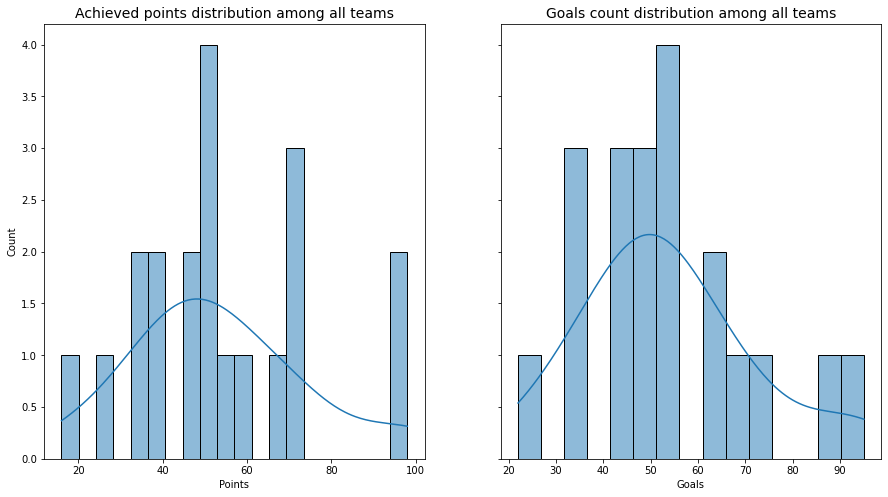

In [421]:
ax, fig = plt.subplots(1, 2, figsize=(15, 8), sharey = True)

sns.histplot(x = teams['wins']*3 + teams['draws'], bins = 20, kde = True, ax = fig[0]).set_title("Achieved points distribution among all teams", fontsize = 14)
fig[0].axes.set_xlabel('Points')

sns.histplot(x = teams["goals_scored"], bins = 15, kde = True, ax = fig[1]).set_title("Goals count distribution among all teams", fontsize = 14)
fig[1].axes.set_xlabel('Goals')

f.tight_layout()

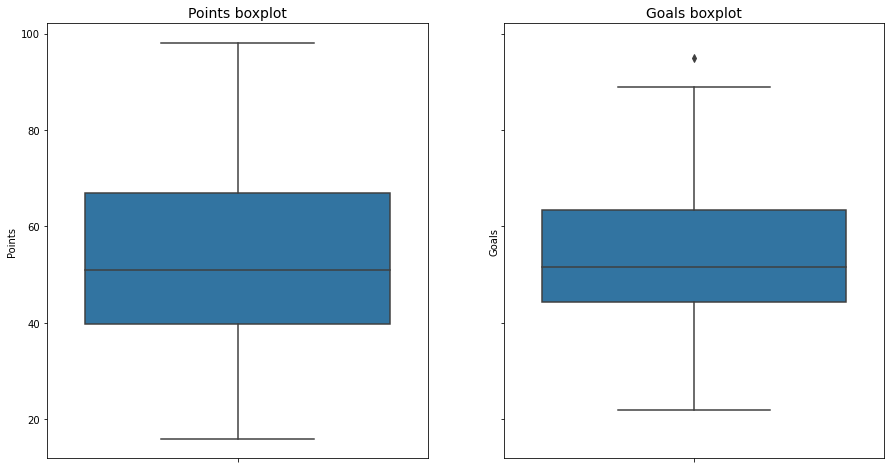

In [422]:
ax, fig = plt.subplots(1, 2, figsize=(15, 8), sharey = True)


sns.boxplot(y = teams['wins']*3 + teams['draws'], ax = fig[0]).set_title("Points boxplot", fontsize = 14)
fig[0].axes.set_ylabel('Points')

sns.boxplot(y = teams['goals_scored'], ax = fig[1]).set_title("Goals boxplot", fontsize = 14)
fig[1].axes.set_ylabel('Goals')

f.tight_layout()

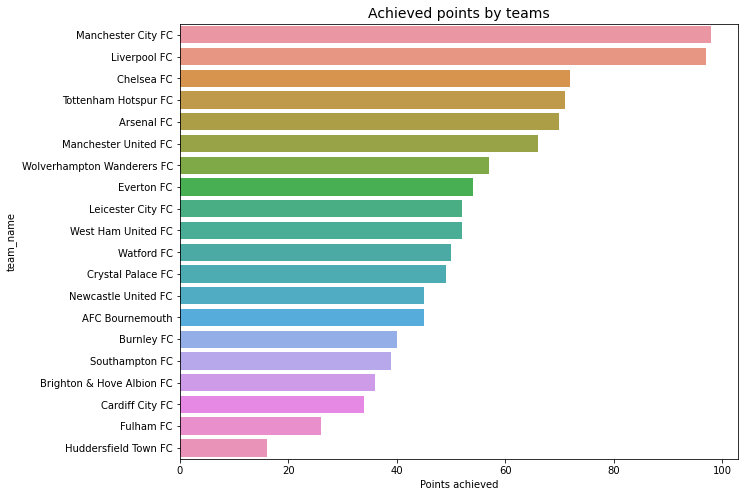

In [423]:
plt.figure(figsize=(10, 8))
sns.barplot(y = teams.sort_values(by = ['league_position'])['team_name'], x = teams['wins']*3 + teams['draws']).set_title("Achieved points by teams", fontsize = 14)
plt.xlabel("Points achieved")

f.tight_layout()

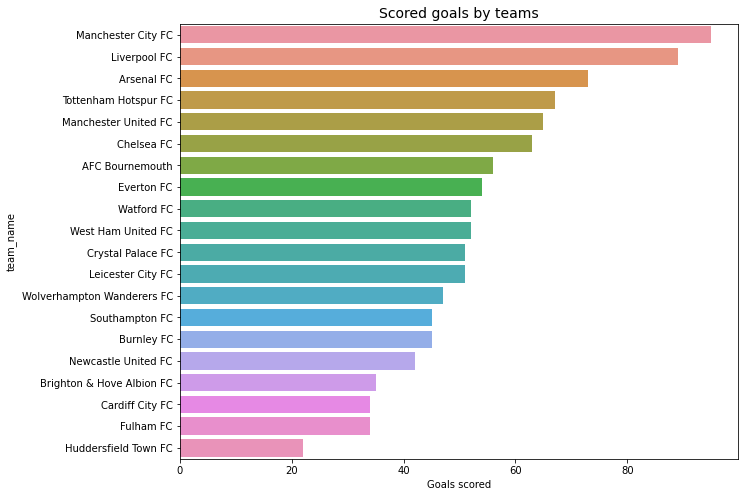

In [424]:
plt.figure(figsize=(10, 8))
sns.barplot(y = teams.sort_values(by = ['goals_scored'], ascending = False)['team_name'], x = teams["goals_scored"]).set_title("Scored goals by teams", fontsize = 14)
plt.xlabel("Goals scored")

f.tight_layout()

# Q1:Findings

Based on the above analysis, it was found that in the League, on average, teams score in the area of 50 to 60 points and also score in the area of 50 to 60 goals. With the exception of two teams - Manchester city and Liverpool who scored 95 and 89 goals and scored 98 and 97 points respectively

# Q2. Analysis of results such as the number of wins and points scored by teams throughout the season

The "games" dataframe will be used, which stores data on the results of teams, goals scored by the home team, the away team, and the time of their performance in all matches.

In [425]:
# creating two lists in order to store teams results in each game

home_result = []
away_result = []

x = 0
while x < 380:
    home_result.append(0)
    away_result.append(0)
    x = x + 1

In [426]:
games["home_result"] = home_result
games["away_result"] = away_result

In [427]:
# assign values 3, 1 and 0 to games dataframe
# 3 points will be assigned to a team if number of goals of home team will be more than away team
# 1 point if number of goals of home team will be equal to away team
# 0 if number of goals of home team will be less than away team

for x in games.index:
    if games.loc[x,"home_team_goal_count"] > games.loc[x, "away_team_goal_count"]:
        games.loc[x, "home_result"] = 3
        games.loc[x, "away_result"] = 0
    if games.loc[x, "home_team_goal_count"] == games.loc[x, "away_team_goal_count"]: 
        games.loc[x, "home_result"] = 1
        games.loc[x, "away_result"] = 1
    if games.loc[x, "home_team_goal_count"] < games.loc[x, "away_team_goal_count"]:  
        games.loc[x, "home_result"] = 0
        games.loc[x, "away_result"] = 3

In [428]:
# We will take 3 teams to show their indicators: Manchester City, Liverpool, Arsenal

# calculating Manchester City points during whole season
manCityRes = games
indexesManCity = []
for i in range(0,len(manCityRes),1):
    if manCityRes['away_team_name'][i]=='Manchester City':
        indexesManCity.append(manCityRes['away_result'][i])
    elif manCityRes['home_team_name'][i]=='Manchester City':
        indexesManCity.append(manCityRes['home_result'][i])

In [429]:
# calculating Liverpool points during whole season
livRes = games
indexesLiv = []
for i in range(0,len(livRes),1):
    if livRes['away_team_name'][i]=='Liverpool':
        indexesLiv.append(livRes['away_result'][i])
    elif livRes['home_team_name'][i]=='Liverpool':
        indexesLiv.append(livRes['home_result'][i])

In [430]:
#calculating Arsenal points during whole season
arsRes = games
indexesArs = []
for i in range(0,len(arsRes),1):
    if arsRes['away_team_name'][i]=='Arsenal':
        indexesArs.append(arsRes['away_result'][i])
    elif arsRes['home_team_name'][i]=='Arsenal':
        indexesArs.append(arsRes['home_result'][i])

In [431]:
livPoint = games
manCityPoint = games
arsPoint = games

In [432]:
# assigning the teams results to livpoint, Mancitypoint and Arspoint lists

pointsLiv = []
for i in range(0,len(livPoint),1):
    if livPoint['away_team_name'][i]=='Liverpool':
        pointsLiv.append(livPoint['away_result'][i])
    elif livPoint['home_team_name'][i]=='Liverpool':
        pointsLiv.append(livPoint['home_result'][i])

pointsMC = []
for i in range(0,len(manCityPoint),1):
    if manCityPoint['away_team_name'][i]=='Manchester City':
        pointsMC.append(manCityPoint['away_result'][i])
    elif manCityPoint['home_team_name'][i]=='Manchester City':
        pointsMC.append(manCityPoint['home_result'][i])
        
pointsArs = []
for i in range(0,len(arsPoint),1):
    if arsPoint['away_team_name'][i]=='Arsenal':
        pointsArs.append(arsPoint['away_result'][i])
    elif arsPoint['home_team_name'][i]=='Arsenal':
        pointsArs.append(arsPoint['home_result'][i])

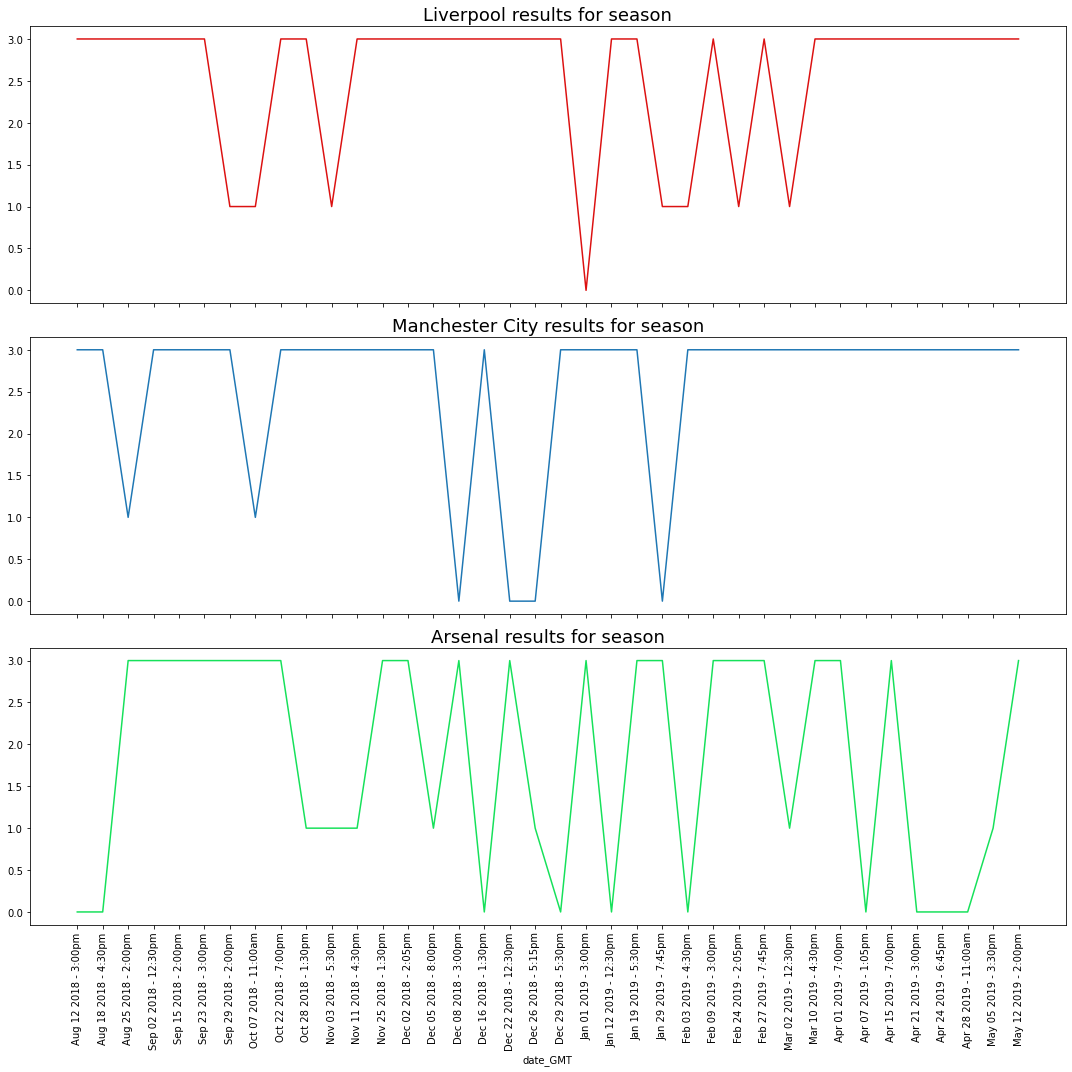

In [433]:
# plotting lineplots to ilustrate

f, fig = plt.subplots(3, 1, figsize = (15, 15), sharex = True, sharey = True)

sns.lineplot(x = games[(games["away_team_name"]=='Liverpool') | (games["home_team_name"]=='Liverpool')]["date_GMT"],
            y = pointsLiv, ax = fig[0], color = "#DC1111" ).set_title("Liverpool results for season", fontsize = 18)

sns.lineplot(x = games[(games["away_team_name"]=='Manchester City') | (games["home_team_name"]=='Manchester City')]["date_GMT"],
            y = pointsMC, ax = fig[1]).set_title("Manchester City results for season", fontsize = 18)

sns.lineplot(x = games[(games["away_team_name"]=='Arsenal') | (games["home_team_name"]=='Arsenal')]["date_GMT"],
            y = pointsArs, ax = fig[2], color = "#16E15A").set_title("Arsenal results for season", fontsize = 18)

plt.xticks(rotation = 90)

f.tight_layout()

In [434]:
# Let's plot cumulative lineplot with incresing number of points distributed by a time

for i in range(1, len(pointsLiv), 1):
    pointsLiv[i] += pointsLiv[i-1]

    
for i in range(1, len(pointsMC), 1):
    pointsMC[i] += pointsMC[i-1]
    

for i in range(1, len(pointsArs), 1):
    pointsArs[i] += pointsArs[i-1]

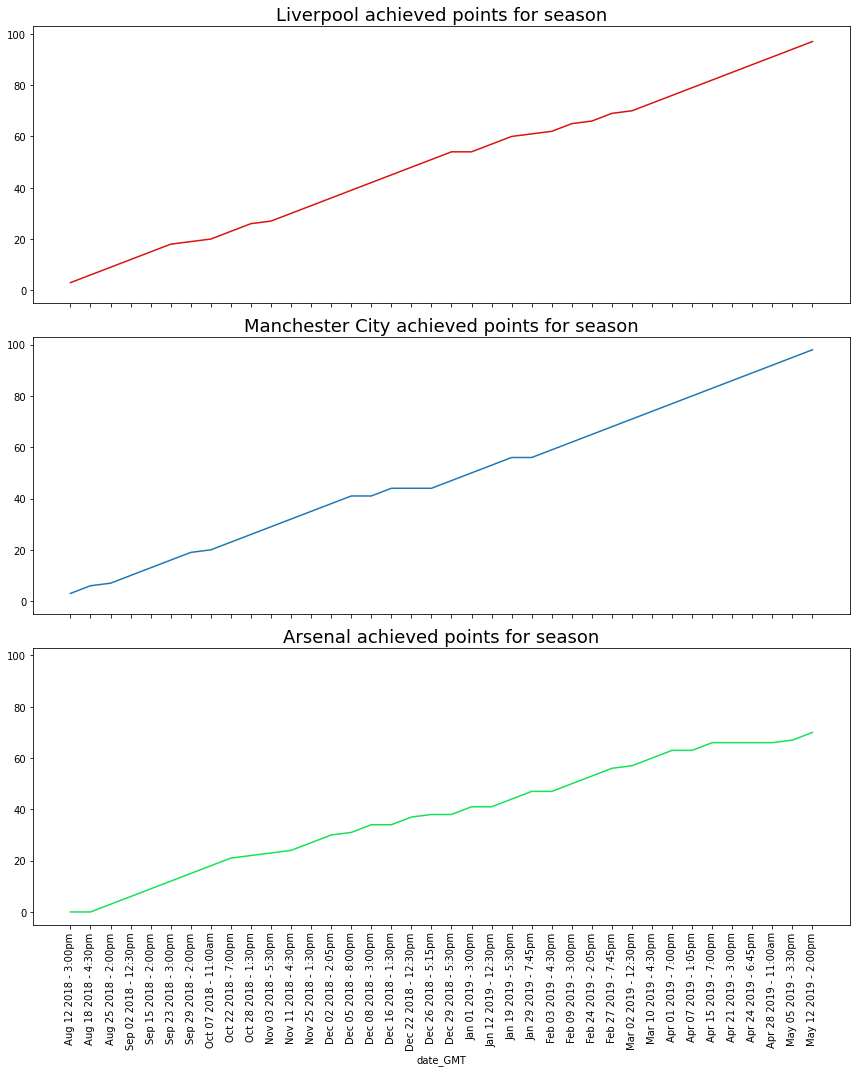

In [435]:
f, fig = plt.subplots(3, 1, figsize = (12, 15), sharex = True, sharey = True)

sns.lineplot(x = games[(games["away_team_name"]=='Liverpool') | (games["home_team_name"]=='Liverpool')]["date_GMT"],
            y = pointsLiv, ax = fig[0], color = "#DC1111").set_title("Liverpool achieved points for season", fontsize = 18)

sns.lineplot(x = games[(games["away_team_name"]=='Manchester City') | (games["home_team_name"]=='Manchester City')]["date_GMT"],
            y = pointsMC, ax = fig[1]).set_title("Manchester City achieved points for season", fontsize = 18)

sns.lineplot(x = games[(games["away_team_name"]=='Arsenal') | (games["home_team_name"]=='Arsenal')]["date_GMT"],
            y = pointsArs, ax = fig[2], color = "#16E15A").set_title("Arsenal achieved points for season", fontsize = 18)

plt.xticks(rotation = 90)

f.tight_layout()

# Q2: Findings

Based on this analysis, it was found that Manchester city and Liverpool have a similar length of appearances, but Liverpool have a large number of draws, while Manchester city have a smaller number. Arsenal has no stability because of what is constantly taking place in the descents and ascents.

# Q3. Team performance in the first half of the match and in the second half

The "League" dataframe will be used , which stores data on the number of goals for a period of time with an interval of 10 minutes and 15 minutes

In [436]:
# creating goals and intervals lists to assign values in league dataframe

goals = []

goals.extend(league["goals_min_0_to_10"])
goals.extend(league["goals_min_11_to_20"])
goals.extend(league["goals_min_21_to_30"])
goals.extend(league["goals_min_31_to_40"])
goals.extend(league["goals_min_41_to_50"])
goals.extend(league["goals_min_51_to_60"])
goals.extend(league["goals_min_61_to_70"])
goals.extend(league["goals_min_71_to_80"])
goals.extend(league["goals_min_81_to_90"])

intervals = []

intervals.extend(league[["goals_min_0_to_10"]])
intervals.extend(league[["goals_min_11_to_20"]])
intervals.extend(league[["goals_min_21_to_30"]])
intervals.extend(league[["goals_min_31_to_40"]])
intervals.extend(league[["goals_min_41_to_50"]])
intervals.extend(league[["goals_min_51_to_60"]])
intervals.extend(league[["goals_min_61_to_70"]])
intervals.extend(league[["goals_min_71_to_80"]])
intervals.extend(league[["goals_min_81_to_90"]])

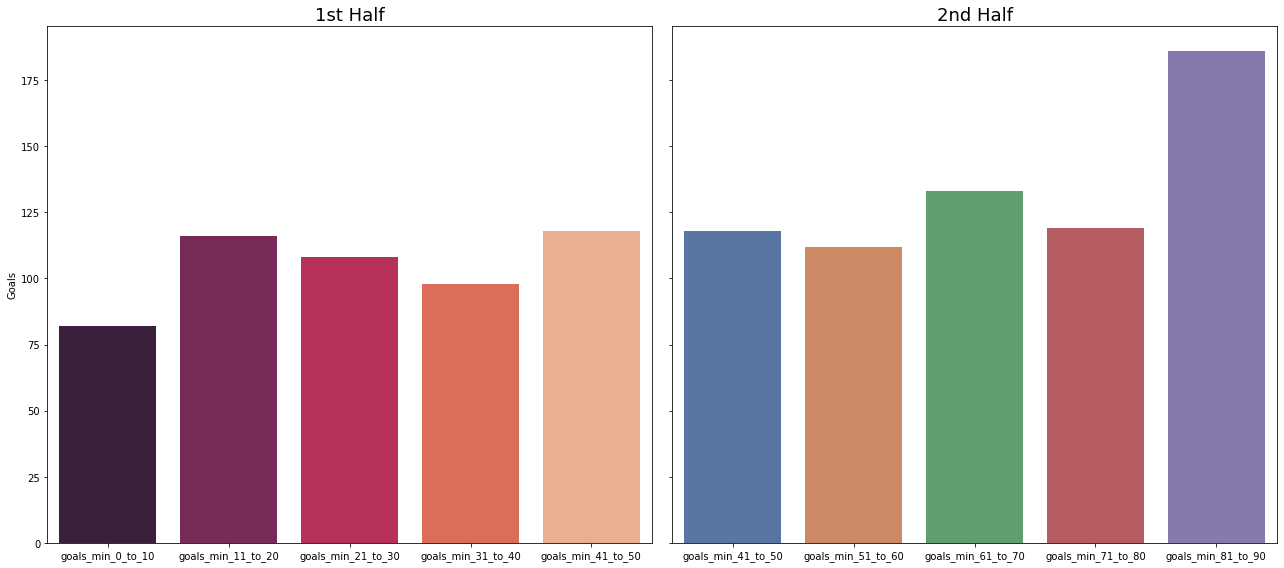

In [437]:
# plotting barplot to show scored goals distribution by 10 minutes intervals

f, fig = plt.subplots( 1, 2, figsize = (18, 8), sharey = True)

sns.barplot(x = intervals[:5], y = goals[:5], palette="rocket", ax = fig[0]).set_title("1st Half", fontsize = 18)
fig[0].axes.set_ylabel('Goals')

sns.barplot(x = intervals[4:], y = goals[4:], palette="deep", ax = fig[1]).set_title("2nd Half", fontsize = 18)

f.tight_layout()

In [438]:
goals15 = []

goals15.extend(league["goals_min_0_to_15"])
goals15.extend(league["goals_min_16_to_30"])
goals15.extend(league["goals_min_31_to_45"])
goals15.extend(league["goals_min_46_to_60"])
goals15.extend(league["goals_min_61_to_75"])
goals15.extend(league["goals_min_76_to_90"])


intervals15 = []

intervals15.extend(league[["goals_min_0_to_15"]])
intervals15.extend(league[["goals_min_16_to_30"]])
intervals15.extend(league[["goals_min_31_to_45"]])
intervals15.extend(league[["goals_min_46_to_60"]])
intervals15.extend(league[["goals_min_61_to_75"]])
intervals15.extend(league[["goals_min_76_to_90"]])


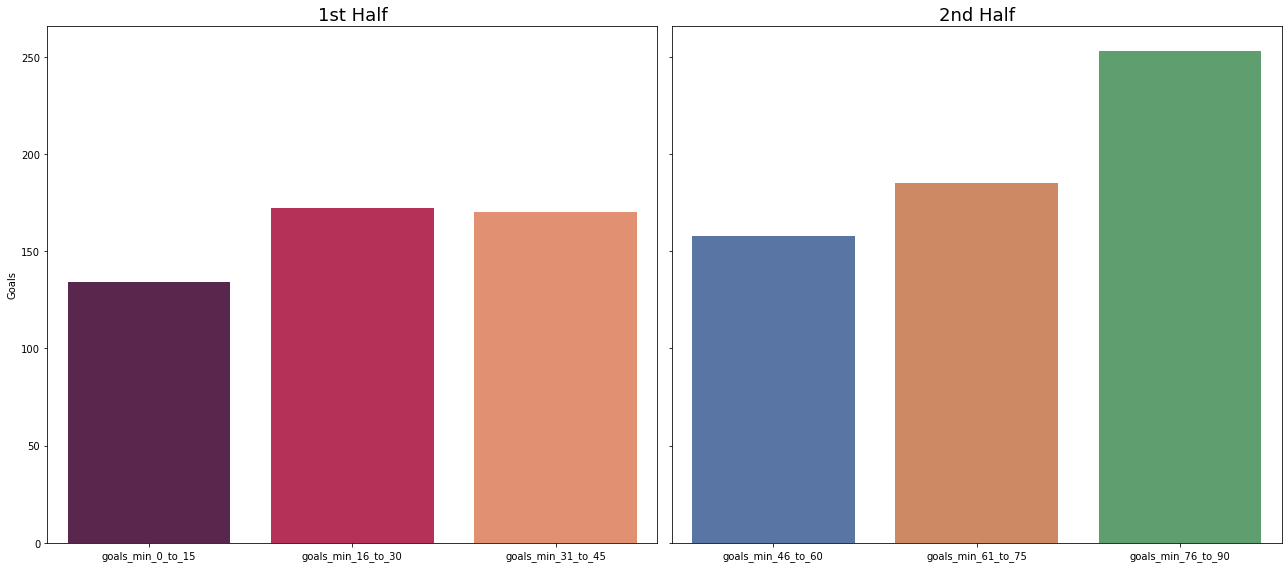

In [439]:
# plotting barplot to show scored goals distribution by 10 minutes intervals

f, fig = plt.subplots( 1, 2, figsize = (18, 8), sharey = True)

sns.barplot(x = intervals15[:3], y = goals15[:3], palette="rocket", ax = fig[0]).set_title("1st Half", fontsize = 18)
fig[0].axes.set_ylabel('Goals')

sns.barplot(x = intervals15[3:], y = goals15[3:], palette="deep", ax = fig[1]).set_title("2nd Half", fontsize = 18)

f.tight_layout()

# Q3: Findings

Based on this survey, it was found that in this season of the Premier League, goals were scored more often between the 81st and 90th minutes, that is, at the end of matches

# Q4: Analysis of players resultative actions

The "players" dataframe will be used, which stores information about goals scored, pre-goal passes(assists) and the number of matches in which goalkeepers did not concede a goal during the match(clean sheets)

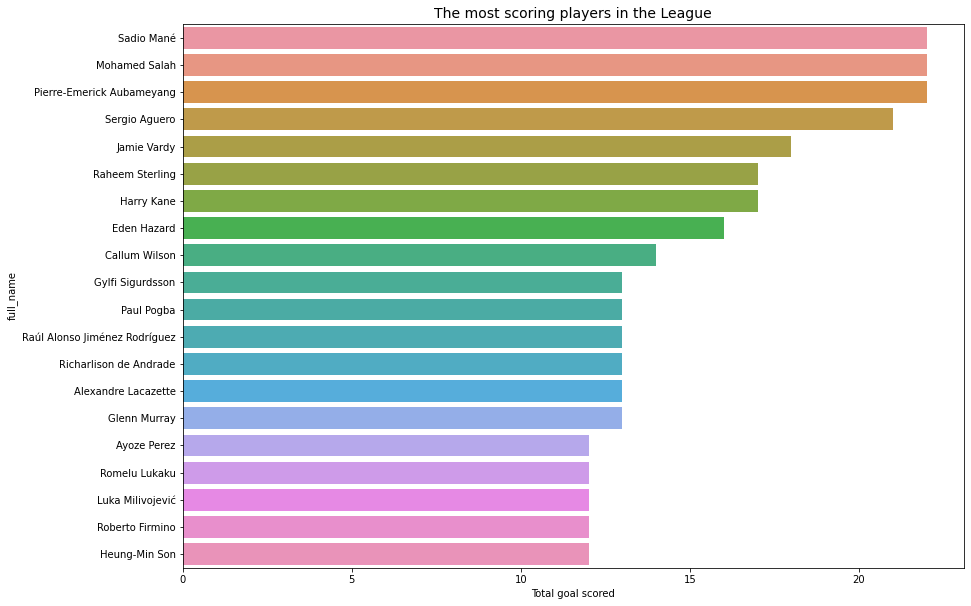

In [440]:
plt.figure(figsize = (14, 10))

sns.barplot(y = players.sort_values(by = ["goals_overall"], ascending = False )["full_name"][:20], x = players["goals_home"] + players["goals_away"]).set_title('The most scoring players in the League', fontsize = 14)
plt.xlabel("Total goal scored")
f.tight_layout()

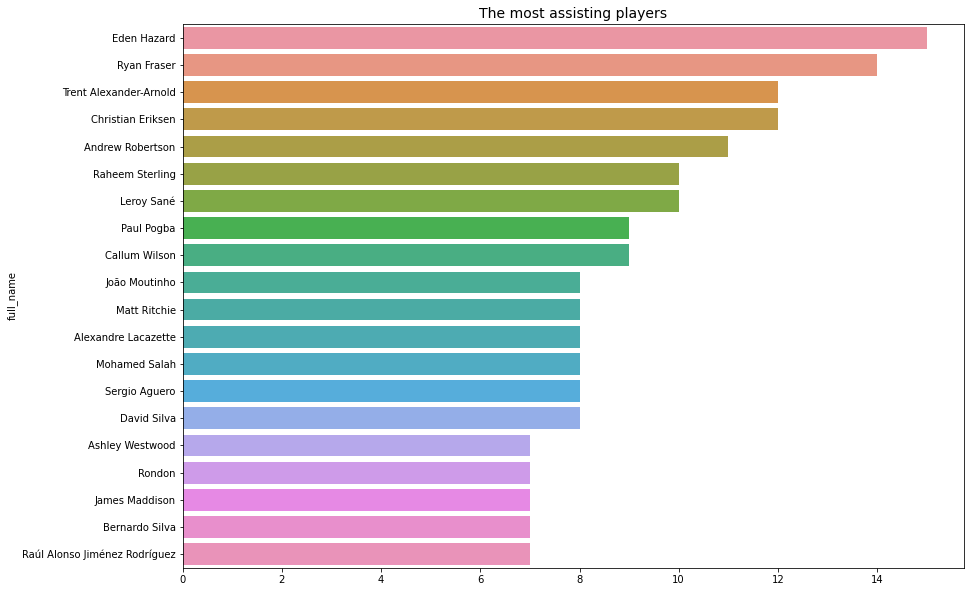

In [441]:
plt.figure(figsize = (14, 10))

sns.barplot(y = players.sort_values(by = ["assists_overall"],
            ascending = False )["full_name"][:20], 
            x = players["assists_home"] + players["assists_away"]).set_title('The most assisting players', fontsize = 14)

f.tight_layout()

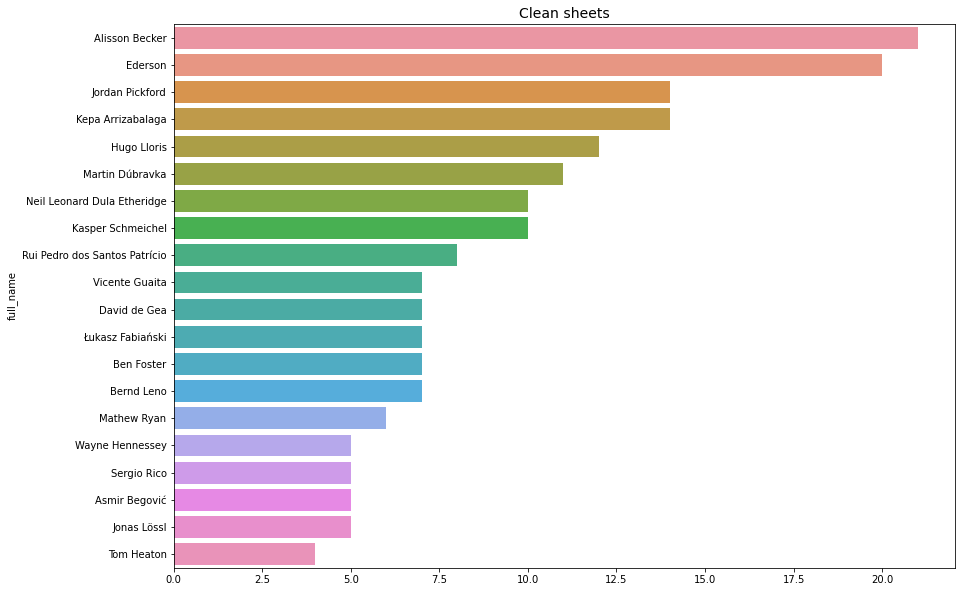

In [442]:
plt.figure(figsize = (14, 10))

sns.barplot(y = players.sort_values(by = ["clean_sheets_overall"],
                                    ascending = False )["full_name"][:20], 
            x = players["clean_sheets_home"] + players["clean_sheets_away"]
           ).set_title('Clean sheets', fontsize = 14)

f.tight_layout()

# Q4: Findings

Based on this survey, it was found that the best players in the League are representatives of the teams leading in the table, as expected. However, players such as Aubameyang and Fraser were in the top, despite the unstable performance of their teams. They can rightfully be considered the best players of their teams

# Q5. Analysis of sports and physiological indicators of players and their relationship

The "players" dataframe will be used, which stores information about age, minutes spent on the field during the season, goals scored, assists and positions of players on the field

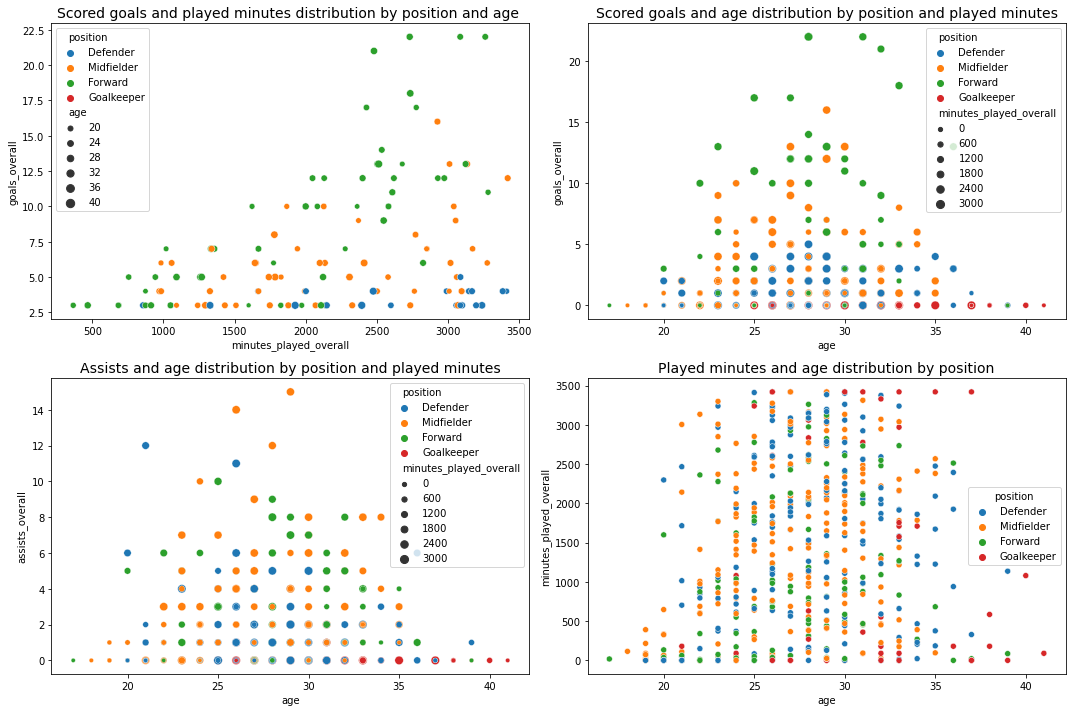

In [443]:
# plotting 4 scatter subplots  

f, fig = plt.subplots(2, 2, figsize = (15, 10))

sns.scatterplot(data = players, y = players[players["goals_overall"] >= 3]["goals_overall"], x = players[players["minutes_played_overall"] >= 90]["minutes_played_overall"]
             , hue = players["position"], size = players["age"], ax = fig[0, 0]).set_title("Scored goals and played minutes distribution by position and age ", fontsize = 14)

sns.scatterplot(data = players, y = players["goals_overall"], x = players["age"], ax = fig[0, 1], hue = players["position"], size = players["minutes_played_overall"]).set_title("Scored goals and age distribution by position and played minutes", fontsize = 14)

sns.scatterplot(data = players, y = players["assists_overall"], x = players["age"], ax = fig[1, 0], hue = players["position"], size = players["minutes_played_overall"]).set_title("Assists and age distribution by position and played minutes", fontsize = 14)

sns.scatterplot(data = players, y = players["minutes_played_overall"], x = players["age"], ax = fig[1, 1], hue = players["position"]).set_title("Played minutes and age distribution by position", fontsize = 14)

f.tight_layout()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


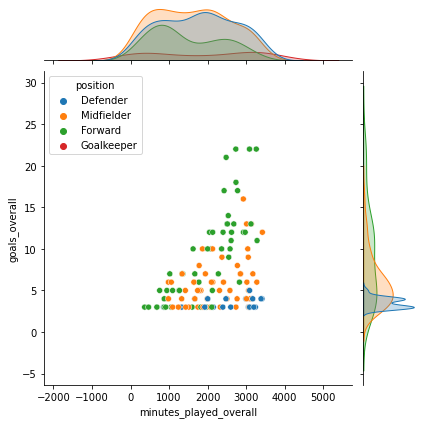

In [444]:
# combine all plots using joint plot

sns.jointplot(data = players, y = players[players["goals_overall"] >= 3]["goals_overall"], x = players[players["minutes_played_overall"] >= 90]["minutes_played_overall"]
             , hue = players["position"])

# Q5: Findings
based on the above analysis, it was found that age, minutes played and performance indicators are related. For example, players over the age of 30 and who have played a lot of matches are mostly goalkeepers, and the age of the highest scoring players is around 27 and 31

# Conclusion

This project presents data from the football sphere. The main indicators of players and teams were analyzed, such as match results, effective actions, etc. Football and other sports are areas where statistics play an important role, along with medicine and business. Based on the available data, I could make even more interesting analyses. However, due to inexperience in data analysis and the Python language, it was difficult to implement the plan. Still, in the future, I hope to master Python well and continue the project.